<a href="https://colab.research.google.com/github/igor-xmchaves/igor-xmchaves/blob/main/Igor_Chaves_Modelo_de_Ising_Processos_Estoc%C3%A1sticos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import warnings

warnings.filterwarnings("ignore")  # Ignora avisos desnecessários
np.random.seed(123)  # Semente para reprodução

In [ ]:
def ising2D(Nx, Ny, spin, pflip):
    """
    Atualiza a configuração de spins usando o algoritmo de Monte Carlo.
    """
    N = Nx * Ny  # Total de spins na rede
    r = int(np.random.random() * N)  # Escolhe um spin aleatório
    x = np.mod(r, Nx)  # Coordenada x
    y = r // Nx  # Coordenada y

    # Identifica os spins vizinhos
    s0 = spin[r]
    s1 = spin[np.mod(x + 1, Nx) + y * Ny]
    s2 = spin[x + np.mod(y + 1, Ny) * Nx]
    s3 = spin[np.mod(x - 1 + Nx, Nx) + y * Nx]
    s4 = spin[x + np.mod(y - 1 + Ny, Ny) * Nx]

    # Soma dos spins vizinhos
    neighbours = s1 + s2 + s3 + s4

    # Determina os índices para acessar pflip
    pfliprow = 0 if s0 == 1 else 1
    pflipcol = { -4: 0, -2: 1, 0: 2, 2: 3, 4: 4 }.get(neighbours, 2)  # Evita erro com valores inesperados

    # Aplica a regra de flip do spin com base na probabilidade calculada
    if np.random.random() < pflip[pfliprow, pflipcol]:
        spin[r] = -spin[r]

    return spin

In [ ]:
def ising_metropolis_2D(J, H, T, Nx, Ny, steps, warmup_steps):
    """
    Executa o algoritmo de Metropolis-Hastings para o modelo de Ising 2D.
    """
    N = Nx * Ny  # Total de spins
    k = 1  # Constante de Boltzmann
    M = np.zeros(len(T))  # Magnetização

    for t in tqdm.trange(len(T)):
        spin = np.ones(N)  # Configuração inicial com todos os spins alinhados
        B = 1 / (k * T[t])  # Inverso da temperatura
        pflip = np.zeros([2, 5])  # Matriz de probabilidades de flip

        # Pré-calcula as probabilidades de transição
        Si = 1
        Sj = -4
        for i in range(2):
            for j in range(5):
                pflip[i, j] = np.exp(2 * (H + J * Sj) * Si * -B)
                Sj += 2
            Si = -1
            Sj = -4

        # Etapa de aquecimento
        for _ in range(warmup_steps):
            spin = ising2D(Nx, Ny, spin, pflip)

        # Simulação Monte Carlo
        for _ in range(steps):
            spin = ising2D(Nx, Ny, spin, pflip)
            M[t] += np.sum(spin) / (N * steps)  # Normaliza antes da soma

    return T, M

100%|██████████| 1/1 [00:03<00:00,  3.63s/it]


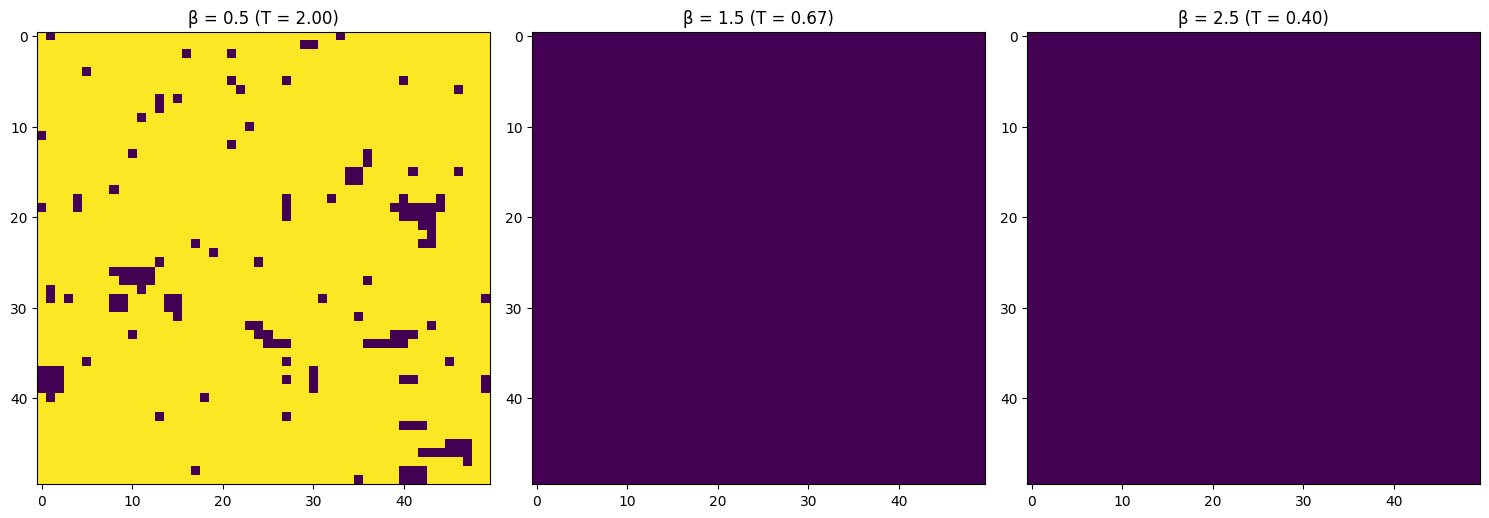

In [ ]:
# Definição de três valores de beta
betas = [0.5, 1.5, 2.5]  # Valores de β no intervalo (0,3)
temperaturas = [1 / beta for beta in betas]  # Conversão para temperatura

# Parâmetros do sistema
Nx, Ny = 50, 50  # Tamanho da grade
steps, warmup_steps = 100000, 100000  # Número de passos de simulação

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Criar subplots

for i, beta in enumerate(betas):
    T = [1 / beta]  # Define a temperatura correspondente
    _, M = ising_metropolis_2D(1.0, 0.0, T, Nx, Ny, steps, warmup_steps)

    # Inicializa a configuração de spins para visualização
    spin = np.ones(Nx * Ny)
    pflip = np.zeros([2, 5])
    B = 1 / (1 * T[0])
    Si, Sj = 1, -4
    for row in range(2):
        for col in range(5):
            pflip[row, col] = np.exp(2 * (0.0 + 1.0 * Sj) * Si * -B)
            Sj += 2
        Si = -1
        Sj = -4

    # Etapa de aquecimento
    for _ in range(warmup_steps):
        spin = ising2D(Nx, Ny, spin, pflip)

    # Simulação Monte Carlo
    for _ in range(steps):
        spin = ising2D(Nx, Ny, spin, pflip)

    # Converte o vetor 1D de spins em uma matriz 2D para visualização
    spin_matrix = spin.reshape((Nx, Ny))
    axes[i].imshow(spin_matrix, interpolation="nearest")  # Exibe a configuração final dos spins
    axes[i].set_title(f"β = {beta:.1f} (T = {1/beta:.2f})")

plt.tight_layout()
plt.show()
